<a href="https://colab.research.google.com/github/wambui-nduta/nduts/blob/main/Banking_Crisis%2C_inflation_Crisis_In_Africa_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ydata_profiling

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from ydata_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# ***1: Load and Explore the Dataset***

## ***A. Display general information about the dataset***

In [ ]:
# Load the dataset
df = pd.read_csv('/content/African_crises_dataset.csv')

In [ ]:
# Show the first few rows of the dataset
df.head(10)  # Displays the first 5 rows of the dataset

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
5,1,DZA,Algeria,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,no_crisis
6,1,DZA,Algeria,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,no_crisis
7,1,DZA,Algeria,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,no_crisis
8,1,DZA,Algeria,1878,0,0.051948,0,0,0.0,-1.492537,0,0,0,no_crisis
9,1,DZA,Algeria,1879,0,0.052029,0,0,0.0,-16.831357,0,0,0,no_crisis


In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())  # Provides details about the dataset, including data types and non-null counts

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12 

In [ ]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())  # Provides statistical summary of numerical columns



Summary statistics:
       country_number         year  systemic_crisis     exch_usd  \
count     1059.000000  1059.000000      1059.000000  1059.000000   
mean        35.613787  1967.767705         0.077432    43.140831   
std         23.692402    33.530632         0.267401   111.475380   
min          1.000000  1860.000000         0.000000     0.000000   
25%         15.000000  1951.000000         0.000000     0.195350   
50%         38.000000  1973.000000         0.000000     0.868400   
75%         56.000000  1994.000000         0.000000     8.462750   
max         70.000000  2014.000000         1.000000   744.306139   

       domestic_debt_in_default  sovereign_external_debt_default  \
count               1059.000000                      1059.000000   
mean                   0.039660                         0.152975   
std                    0.195251                         0.360133   
min                    0.000000                         0.000000   
25%                    0.0

# ***2. Create a pandas profiling reports to gain insights into the dataset***
Let's generate the pandas profiling report for more insights.

In [ ]:
from ydata_profiling import ProfileReport
# Generate a profiling report
profile_report = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile_report.to_notebook_iframe()

# Generate the profiling report
profile_report.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:01<00:00, 11.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## ***3. Handle Missing and corrupted values***

The next thing I did was to identify and handle any missing or corrupted values in the dataset.

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())  # Counts the number of missing values in each column


Missing values:
country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64


## ***4. Remove duplicates, if they exist***
Let's check for duplicates and remove them if they exist.

In [ ]:
# Remove duplicate rows, if any
initial_row_count = df.shape[0]
df.drop_duplicates(inplace=True)
final_row_count = df.shape[0]

print(f"\nInitial row count: {initial_row_count}, Final row count after removing duplicates: {final_row_count}")


Initial row count: 1059, Final row count after removing duplicates: 1059


In [ ]:
# Display unique countries and years
print("\nUnique countries:", df['country'].nunique())  # Counts the number of unique countries
print("Countries:", df['country'].unique())  # Lists the unique country names
print("\nYear range:", df['year'].min(), "to", df['year'].max())  # Displays the range of years in the dataset


Unique countries: 13
Countries: ['Algeria' 'Angola' 'Central African Republic' 'Ivory Coast' 'Egypt'
 'Kenya' 'Mauritius' 'Morocco' 'Nigeria' 'South Africa' 'Tunisia' 'Zambia'
 'Zimbabwe']

Year range: 1860 to 2014


## ***5. Handle Outliers***
I then checked to detect and handle outliers in the dataset.

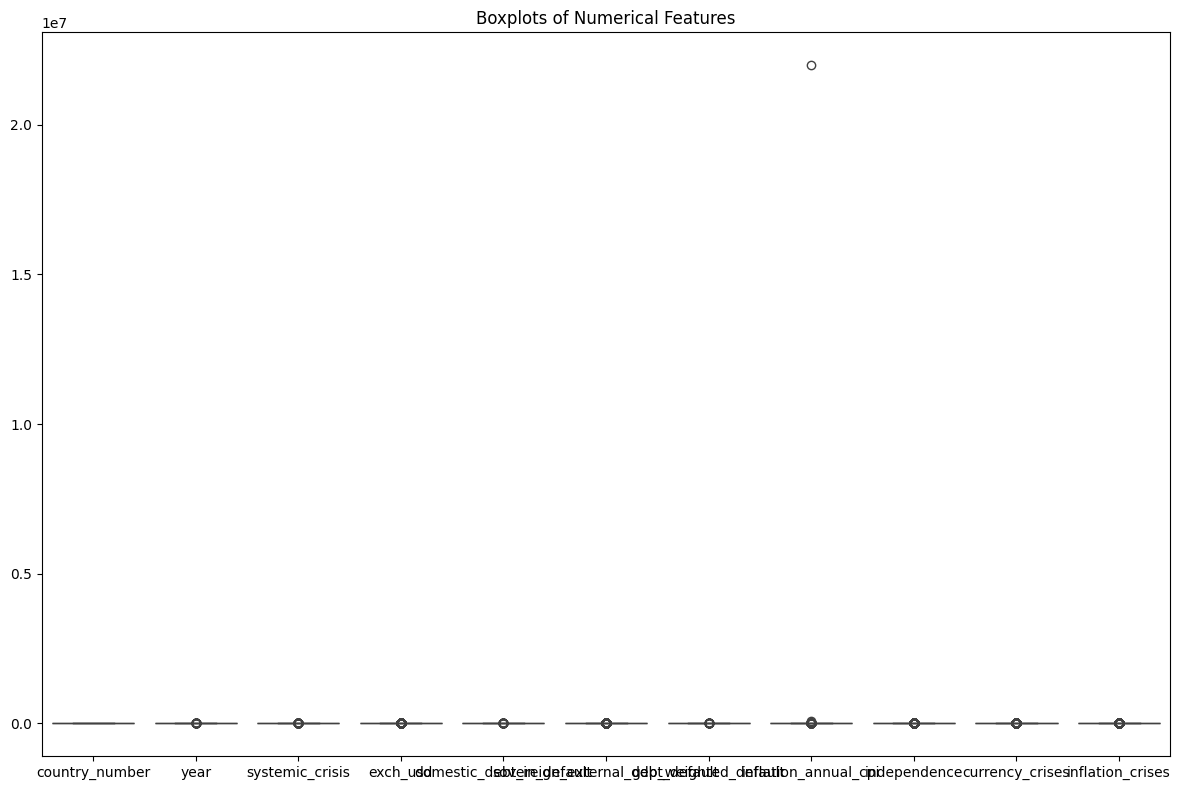

In [ ]:
# Plot boxplots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplots of Numerical Features')
plt.tight_layout()

In [ ]:
# Handle outliers, if they exist
def outliers(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  outliers_index = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)].index

  df.loc[outliers_index, column] = df[column].median()
  return f'replaced outliers with median'

columns = ['exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'currency_crises', 'inflation_crises']
for column in columns:
  outliers(column)

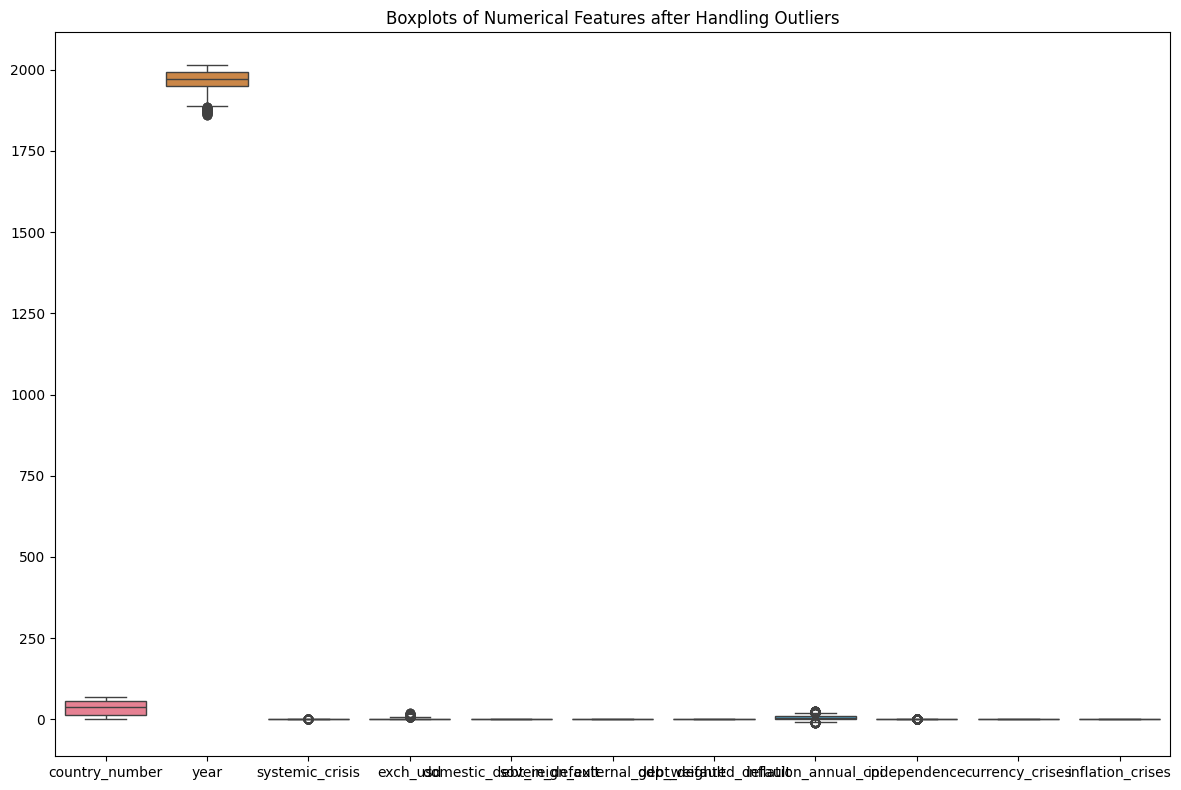

In [ ]:
# Plot boxplots after handling outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplots of Numerical Features after Handling Outliers')
plt.tight_layout()

## ***6. Exploratory Data Analysis (EDA):***
Here, I perform a thorough EDA to understand the distribution and characteristics of the data. It provides a summary of the dataset, creates histograms.

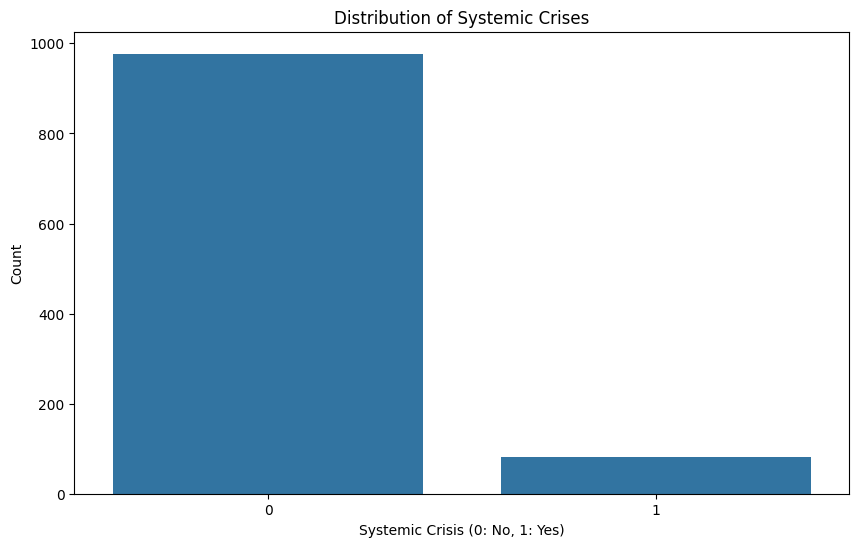

In [ ]:
# Plot the distribution of systemic crises
plt.figure(figsize=(10, 6))
sns.countplot(x='systemic_crisis', data=df)
plt.title('Distribution of Systemic Crises')
plt.xlabel('Systemic Crisis (0: No, 1: Yes)')
plt.ylabel('Count');


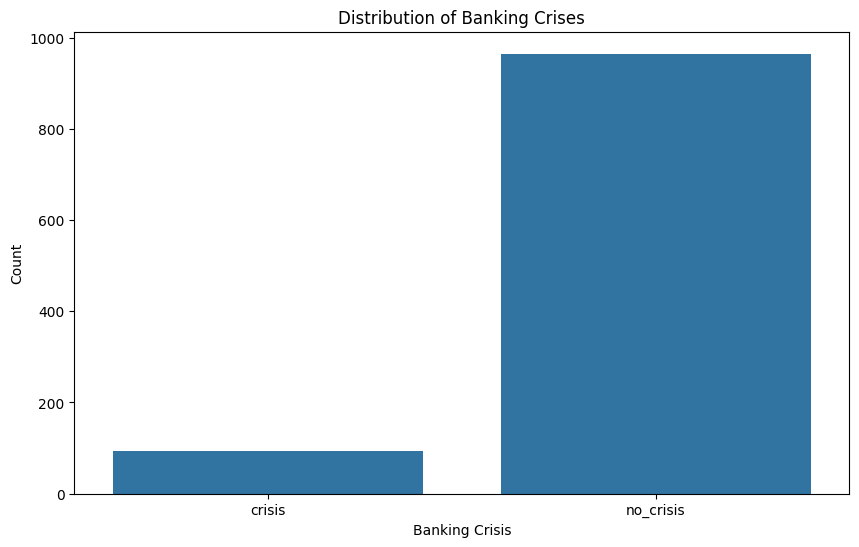

In [ ]:
# Plot the distribution of banking crises
plt.figure(figsize=(10, 6))
sns.countplot(x='banking_crisis', data=df)
plt.title('Distribution of Banking Crises')
plt.xlabel('Banking Crisis')
plt.ylabel('Count');


## ***6. Encode Categorical Features***
Encode non-numeric columns using techniques like label encoding or one-hot encoding.

In [ ]:
# encode categorical features
from sklearn.preprocessing import LabelEncoder
le_country_code = LabelEncoder()
df['country_coded'] = le_country_code.fit_transform(df['country_code'])
le_banking_crisis = LabelEncoder()
df['banking_crisis_coded'] = le_banking_crisis.fit_transform(df['banking_crisis'])

In [ ]:
# Save the encoded dataset

df.to_csv('African_crises_dataset_encoded.csv', index=False)
print("\nCategorical features have been encoded and the dataset has been saved as 'African_crises_dataset_encoded.csv'")


Categorical features have been encoded and the dataset has been saved as 'African_crises_dataset_encoded.csv'


# ***7. Building the Machine Learning Model***



***Instead of using only 'banking_crisis_coded', let’s include more relevant features. Here's an example assuming the columns you've excluded are either identifiers or the target:***

In [ ]:
# select your target variable and the features
# X = df.drop(['country_number', 'country_code', 'country', 'inflation_crises', 'systemic_crisis', 'banking_crisis', 'banking_crisis_coded'], axis=1)
X = df.drop(['country_number', 'country_code', 'country', 'inflation_crises', 'systemic_crisis', 'banking_crisis', 'banking_crisis_coded'], axis=1)
y = df['systemic_crisis']

In [ ]:
# Split your dataset to training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## ***Scaling (especially important for KNN)***

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## ***Train  a Decision Tree Model***

In [ ]:
# Train a Decision Tree Model
dt = DecisionTreeClassifier(max_depth=4, criterion='gini', min_samples_split=10, random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)
Decision_tree_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {Decision_tree_acc}')

Accuracy: 0.9245283018867925


In [ ]:
# Print classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       195
           1       0.60      0.18      0.27        17

    accuracy                           0.92       212
   macro avg       0.77      0.58      0.62       212
weighted avg       0.91      0.92      0.91       212



## ***Train a Random Forest Classifier***

In [ ]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

Random_forest_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {Random_forest_acc}')

Accuracy: 0.9292452830188679


## ***Train a model using KNN***


In [ ]:
# Build a model using knn classifer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

k = int(np.sqrt(len(X_train)))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [ ]:
# make predictions
y_pred = knn.predict(X_test)

In [ ]:
# evaluate the model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9198113207547169


In [ ]:
# Compare the results of the three models
print(f'Decision Tree Accuracy: {Decision_tree_acc}')
print(f'Random Forest Accuracy: {Random_forest_acc}')
print(f'KNN Accuracy: {accuracy}')


Decision Tree Accuracy: 0.9245283018867925
Random Forest Accuracy: 0.9292452830188679
KNN Accuracy: 0.9198113207547169


# ***8. Check for Class Balance***

In [ ]:
print(y.value_counts())
print(y.value_counts(normalize=True))


systemic_crisis
0    977
1     82
Name: count, dtype: int64
systemic_crisis
0    0.922568
1    0.077432
Name: proportion, dtype: float64


- 90% of your data is class 0, a model that predicts all zeros will have 90% accuracy — but that's not a good model.

- We need to ensure the model can detect both classes, especially the minority class.

In [ ]:
from sklearn.metrics import classification_report

print("Decision Tree Report:")
print(classification_report(y_test, dt.predict(X_test)))

print("Random Forest Report:")
print(classification_report(y_test, rf.predict(X_test)))

print("KNN Report:")
print(classification_report(y_test, knn.predict(X_test_scaled)));  # Use scaled data for KNN


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       195
           1       0.60      0.18      0.27        17

    accuracy                           0.92       212
   macro avg       0.77      0.58      0.62       212
weighted avg       0.91      0.92      0.91       212

Random Forest Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       195
           1       0.75      0.18      0.29        17

    accuracy                           0.93       212
   macro avg       0.84      0.59      0.62       212
weighted avg       0.92      0.93      0.91       212

KNN Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       195
           1       0.00      0.00      0.00        17

    accuracy                           0.92       212
   macro avg       0.46      0.50      0.48       212
weighted avg      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no p

### ***Problem: Severe Class Imbalance***

From the results:

* Class `0` (non-crisis): **195 samples**
* Class `1` (crisis): **17 samples**

This means 92% of your data is from class `0`. Despite high overall **accuracy**, **recall for class `1` is extremely low (0.00–0.18)**

- Meaning your model is failing to detect crises, which is likely the more important class!


###  ***Goal: Improve Minority Class (Crisis) Detection***

- Use `SMOTE` (Synthetic Minority Over-sampling Technique)




In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Resample only training data to avoid data leakage
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train models on the resampled data
dt.fit(X_resampled, y_resampled)
rf.fit(X_resampled, y_resampled)
knn.fit(scaler.fit_transform(X_resampled), y_resampled)

# Optional: print the new class distribution
from collections import Counter
print(Counter(y_resampled))

Counter({0: 782, 1: 782})


## ***Retrain Models on Resampled Data***
---
🔸 Decision Tree

In [ ]:
dt.fit(X_resampled, y_resampled)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Report (after SMOTE):")
print(classification_report(y_test, y_pred_dt))


Decision Tree Report (after SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       195
           1       0.25      0.94      0.40        17

    accuracy                           0.77       212
   macro avg       0.62      0.85      0.63       212
weighted avg       0.93      0.77      0.82       212



🔸 Random Forest



In [ ]:
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report (after SMOTE):")
print(classification_report(y_test, y_pred_rf))


Random Forest Report (after SMOTE):
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       195
           1       0.35      0.82      0.49        17

    accuracy                           0.86       212
   macro avg       0.67      0.85      0.71       212
weighted avg       0.93      0.86      0.89       212



🔸 KNN (with scaling)



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_resampled_scaled, y_resampled)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Report (after SMOTE):")
print(classification_report(y_test, y_pred_knn))




KNN Report (after SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       195
           1       0.35      0.94      0.51        17

    accuracy                           0.85       212
   macro avg       0.67      0.89      0.71       212
weighted avg       0.94      0.85      0.88       212



### ***What You Should Look For***

Check the **recall and F1-score for class `1`**:

* SMOTE is designed to help recall, especially for the minority class.

* If **recall increases** (even slightly), that means your model is catching more crisis cases.
* You’re aiming to **balance** recall with precision especially for rare but important events like systemic crises.

